# Student Grades Analysis Prediction 

## Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


# Import Important libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About Datasets

In [111]:
# Import Datasets
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [112]:
df.shape

(571, 43)

In this dataset contain in 571 rows and 43 columns

In [113]:
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

As we can see in this Datasets have lots of Null value present. And we can see in this datasets two course code in another formate. 

In [115]:
# Renaming Course code which is another formate
df.rename(columns={'HS-105/12' : 'HS-105', 'HS-205/20' : 'HS-205'},inplace=True)

In [116]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

# Detecting Null Values

In [117]:
# Checking Null values in Datasets
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105       1
MT-111       2
CS-105       0
CS-106       2
EL-102       2
EE-119       2
ME-107       2
CS-107       2
HS-205       5
MT-222       5
EE-222       7
MT-224       7
CS-210       7
CS-211       5
CS-203       5
CS-214       6
EE-217       6
CS-212       6
CS-215       6
MT-331       9
EF-303      10
HS-304      10
CS-301      10
CS-302      10
TC-383      10
MT-442      10
EL-332       9
CS-318       9
CS-306       9
CS-312      10
CS-317      12
CS-403      12
CS-421      12
CS-406      85
CS-414      13
CS-419      13
CS-423      14
CS-412      79
CGPA         0
dtype: int64

### Observation

1. This dataset contain null values
2. Except seat no, PH-121, HS-101, CS-105 and CGPA columns, All columns have null values.
3. dtype of all columns is object except only CGPA target is in float dtype.
4. CGPA column is our target variable and rest all are our features.
5. Seat no does not have any impact on our target variable so can drop it off.
6. As our target variable is count this is a regression problem

In [118]:
# Lets drop seat no column
df = df.drop(columns=['Seat No.'])

In [119]:
df.shape

(571, 42)

# Treating Missing Values 

In [120]:
missingdata=df.isnull()

In [121]:
# Return counts of values where True if null

for column in missingdata.columns.values.tolist():
    print (missingdata[column].value_counts())
    print("")

PH-121
False    571
Name: count, dtype: int64

HS-101
False    571
Name: count, dtype: int64

CY-105
False    570
True       1
Name: count, dtype: int64

HS-105
False    570
True       1
Name: count, dtype: int64

MT-111
False    569
True       2
Name: count, dtype: int64

CS-105
False    571
Name: count, dtype: int64

CS-106
False    569
True       2
Name: count, dtype: int64

EL-102
False    569
True       2
Name: count, dtype: int64

EE-119
False    569
True       2
Name: count, dtype: int64

ME-107
False    569
True       2
Name: count, dtype: int64

CS-107
False    569
True       2
Name: count, dtype: int64

HS-205
False    566
True       5
Name: count, dtype: int64

MT-222
False    566
True       5
Name: count, dtype: int64

EE-222
False    564
True       7
Name: count, dtype: int64

MT-224
False    564
True       7
Name: count, dtype: int64

CS-210
False    564
True       7
Name: count, dtype: int64

CS-211
False    566
True       5
Name: count, dtype: int64

CS-203
False    566

In [122]:
# Replace missing data with modes
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [123]:
# Confirmation that all null values are replaced 
for column in df_most_common_imputed.isnull().columns.values.tolist():
    print (df_most_common_imputed.isnull()[column].value_counts())
    print("")

PH-121
False    571
Name: count, dtype: int64

HS-101
False    571
Name: count, dtype: int64

CY-105
False    571
Name: count, dtype: int64

HS-105
False    571
Name: count, dtype: int64

MT-111
False    571
Name: count, dtype: int64

CS-105
False    571
Name: count, dtype: int64

CS-106
False    571
Name: count, dtype: int64

EL-102
False    571
Name: count, dtype: int64

EE-119
False    571
Name: count, dtype: int64

ME-107
False    571
Name: count, dtype: int64

CS-107
False    571
Name: count, dtype: int64

HS-205
False    571
Name: count, dtype: int64

MT-222
False    571
Name: count, dtype: int64

EE-222
False    571
Name: count, dtype: int64

MT-224
False    571
Name: count, dtype: int64

CS-210
False    571
Name: count, dtype: int64

CS-211
False    571
Name: count, dtype: int64

CS-203
False    571
Name: count, dtype: int64

CS-214
False    571
Name: count, dtype: int64

EE-217
False    571
Name: count, dtype: int64

CS-212
False    571
Name: count, dtype: int64

CS-215
False 

# Comparing Values counts before after

In [124]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

Column name is: HS-101 and it value is:
 HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

Column name is: CY-105 and it value is:
 CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64

Column name is: HS-105 and it value is:
 HS-105
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64

Column name is: MT-111 and it value is:
 MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64

Column na

In [125]:
# This is the dataframe we imputed with modes
for i in df_most_common_imputed.columns:
    x = df_most_common_imputed[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

Column name is: HS-101 and it value is:
 HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

Column name is: CY-105 and it value is:
 CY-105
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64

Column name is: HS-105 and it value is:
 HS-105
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64

Column name is: MT-111 and it value is:
 MT-111
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64

Column na

# Exploratory Data Analysis (EDA)

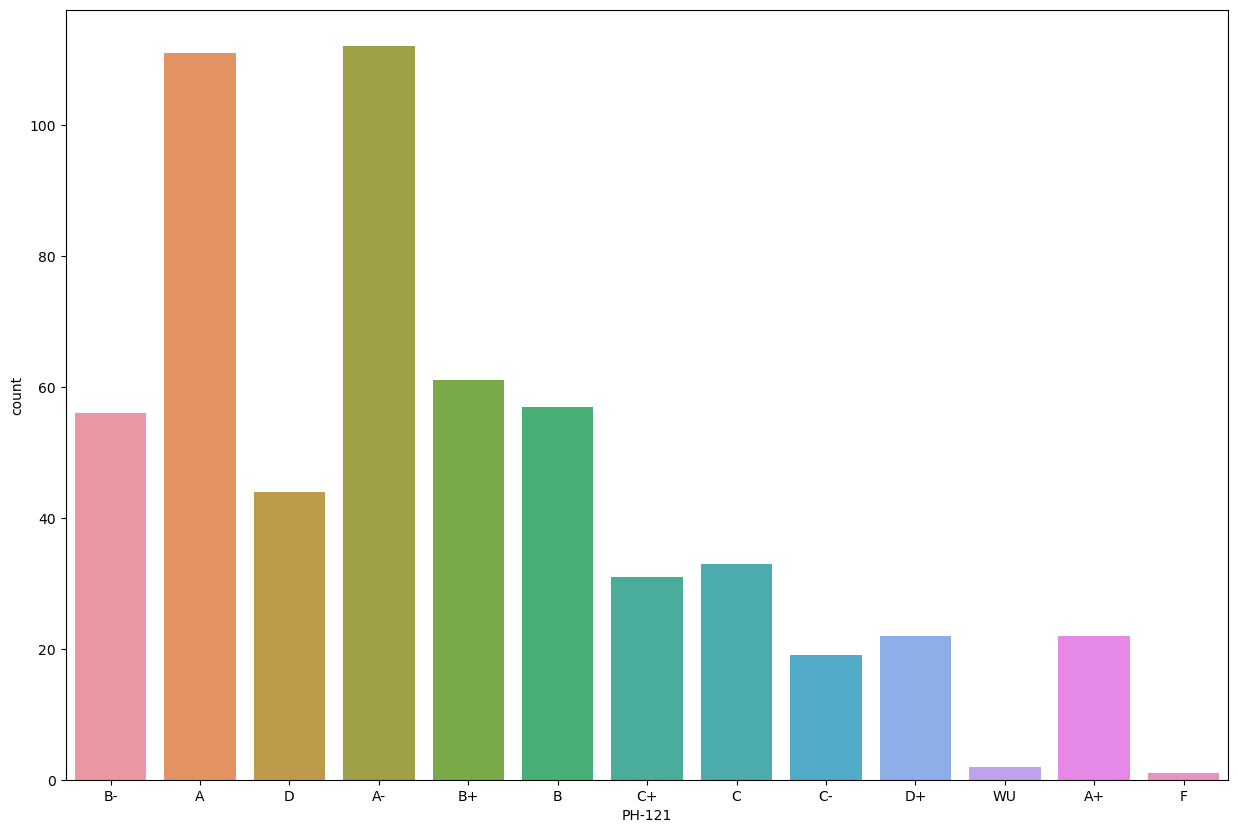

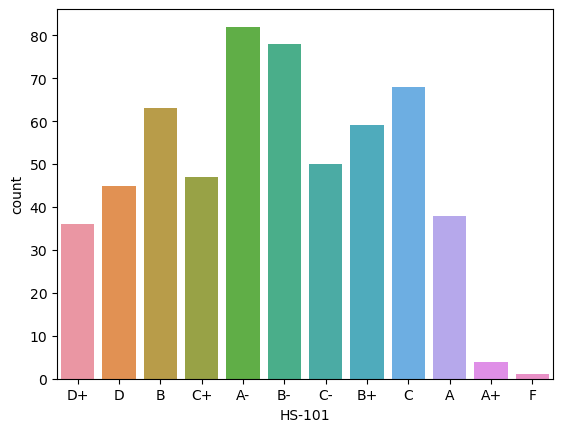

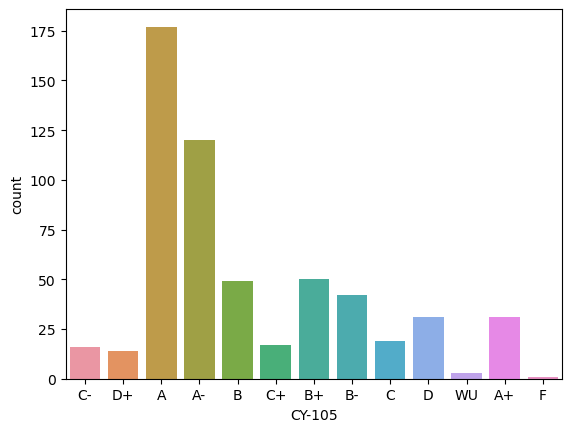

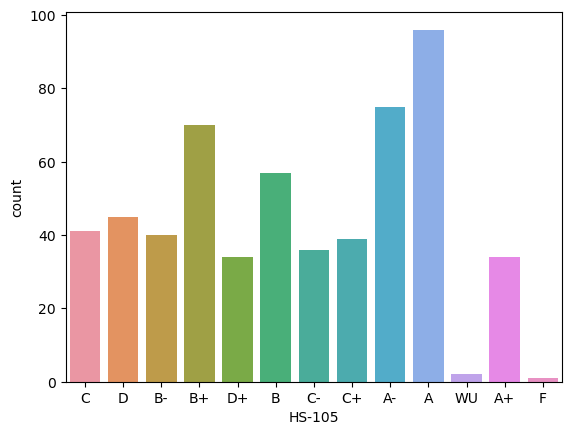

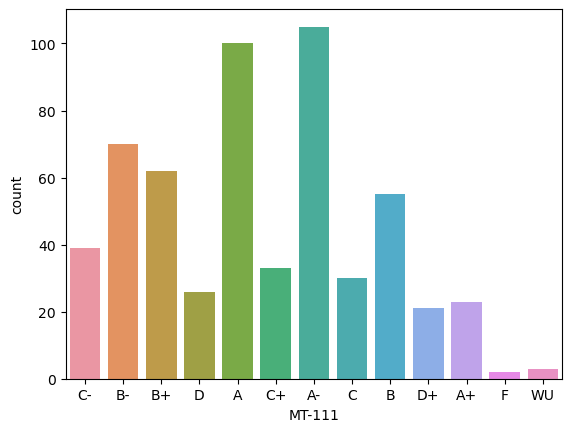

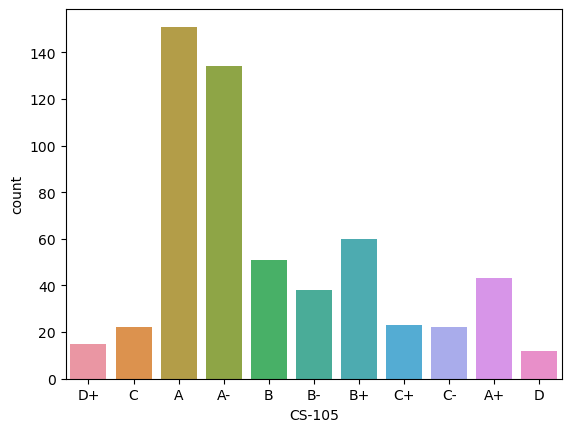

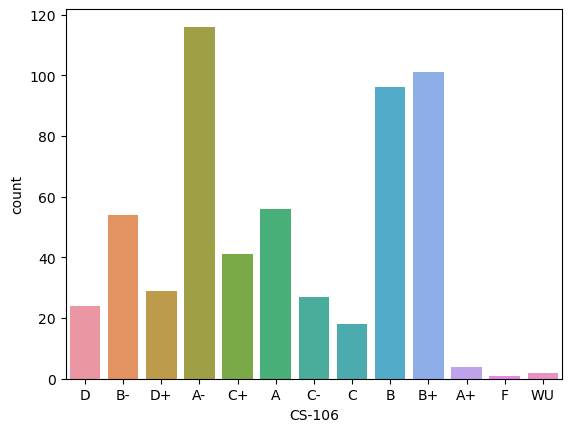

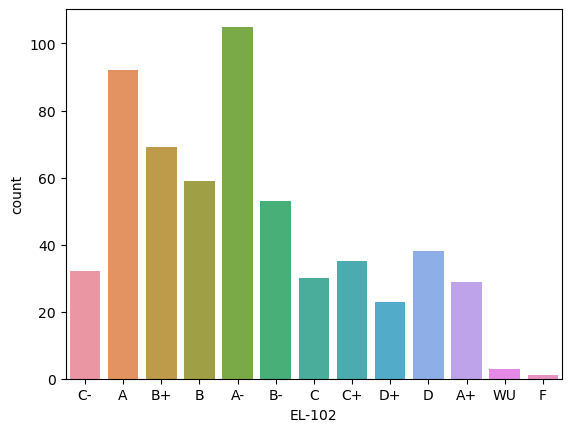

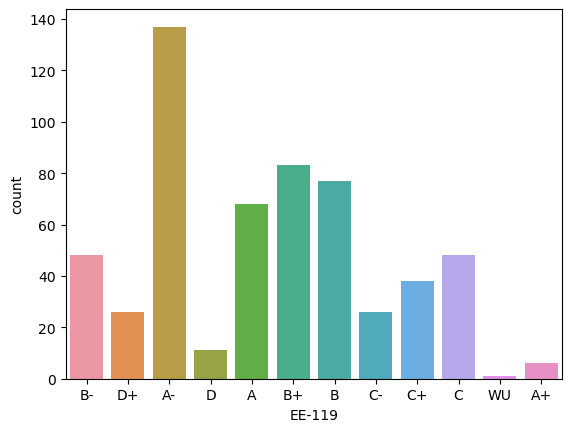

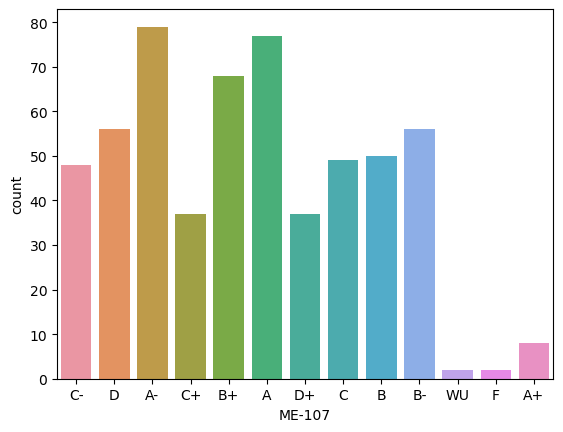

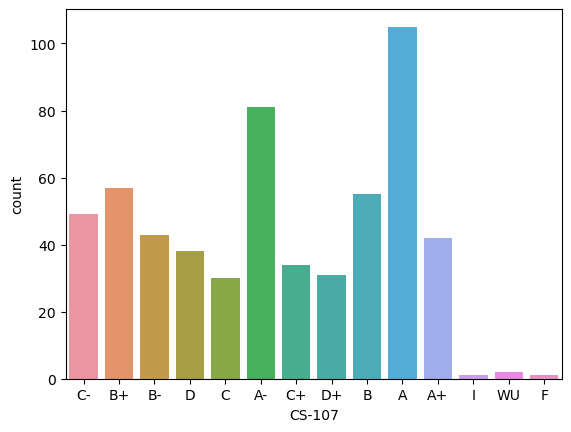

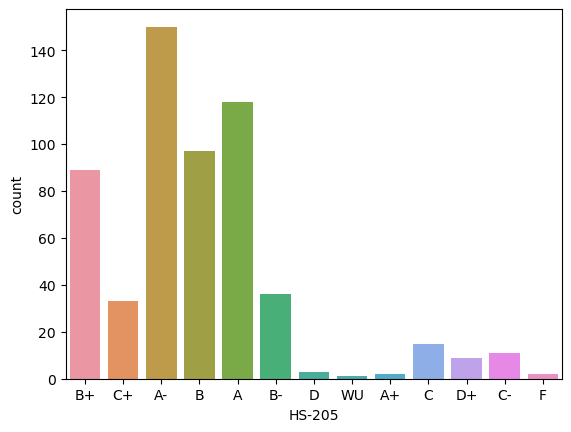

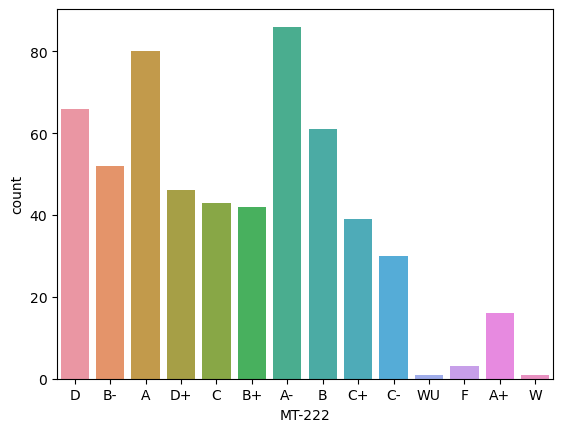

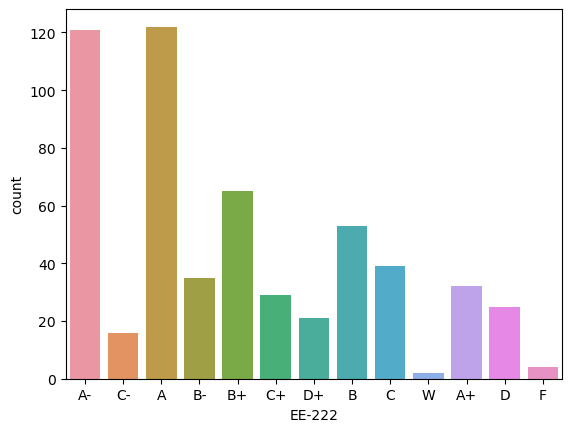

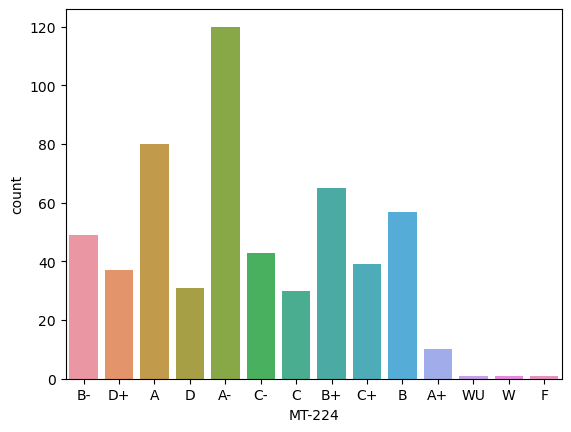

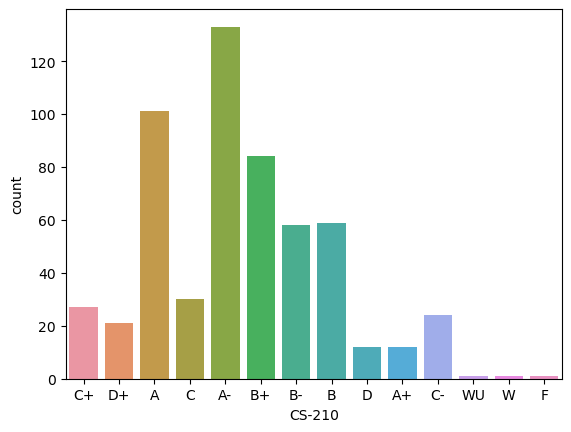

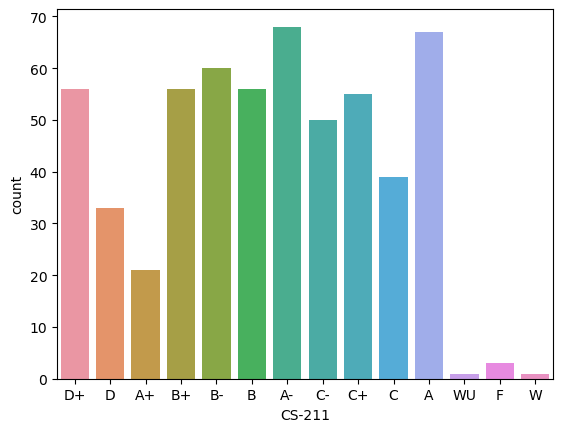

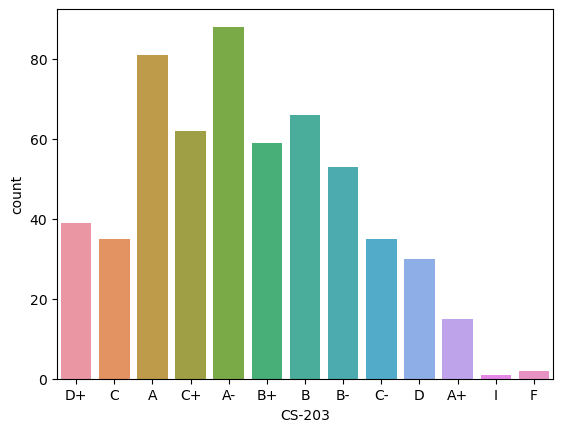

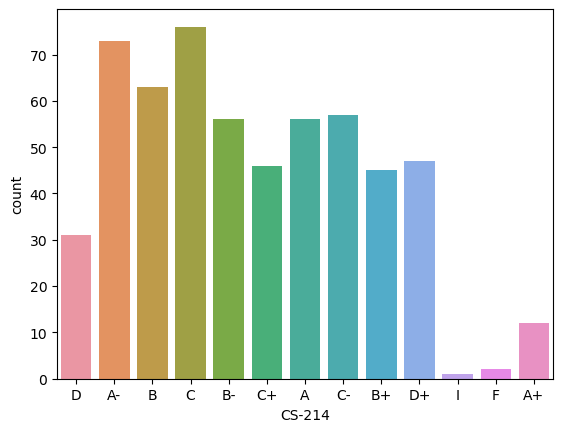

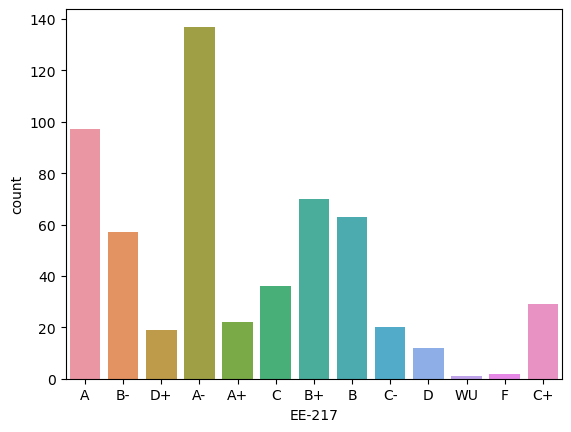

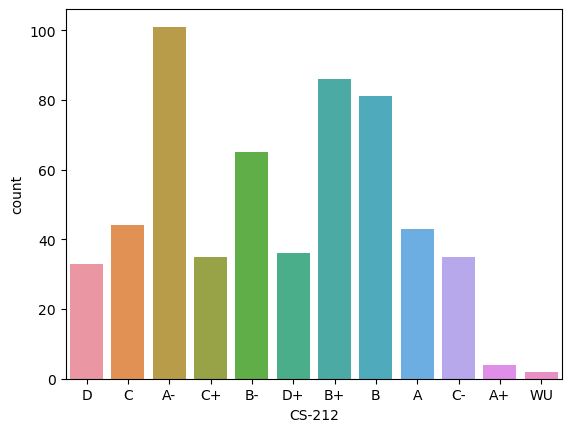

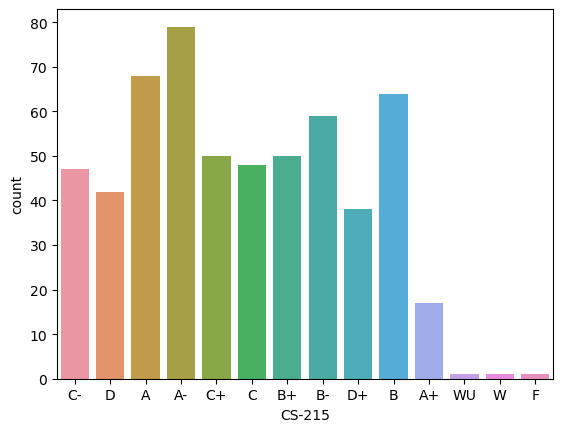

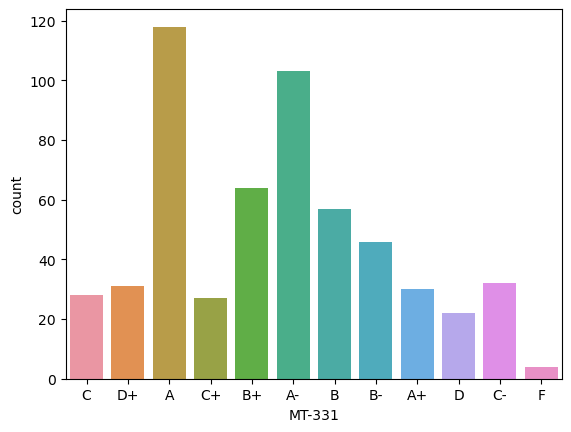

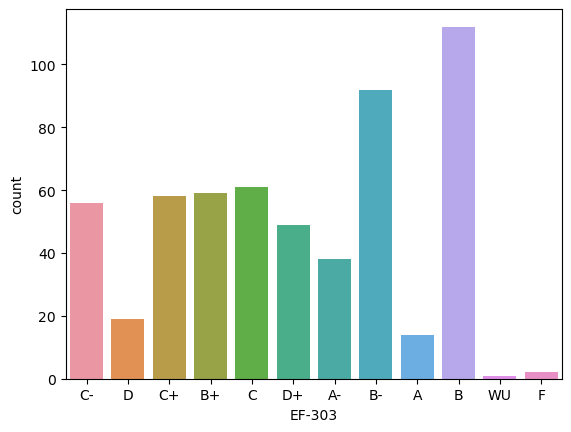

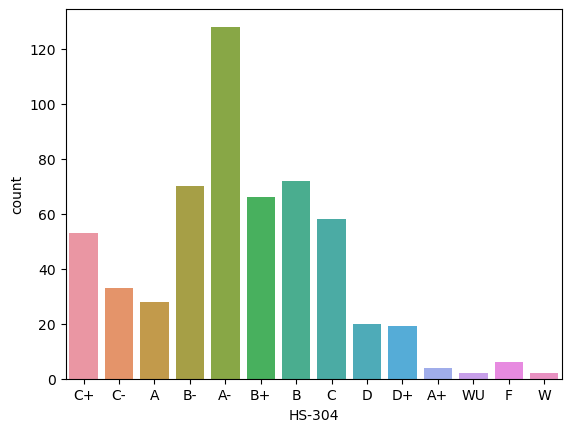

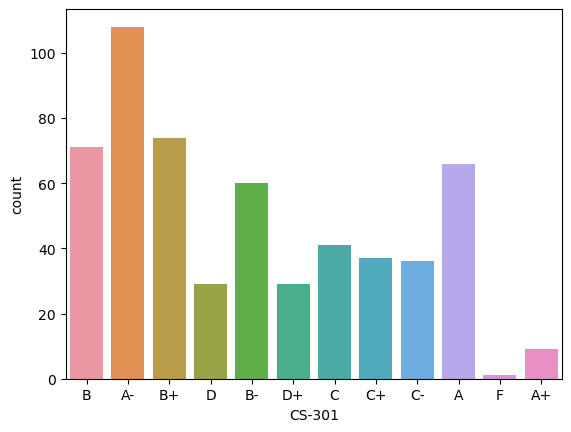

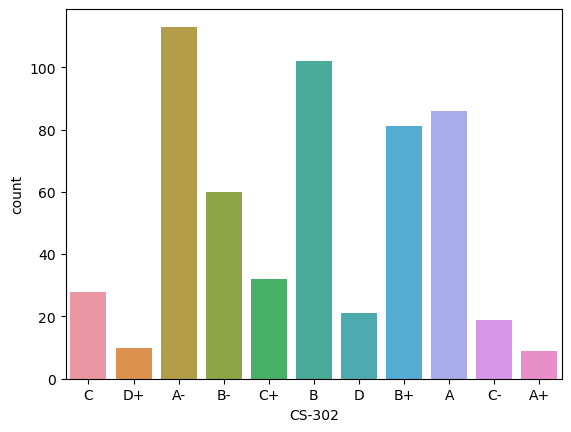

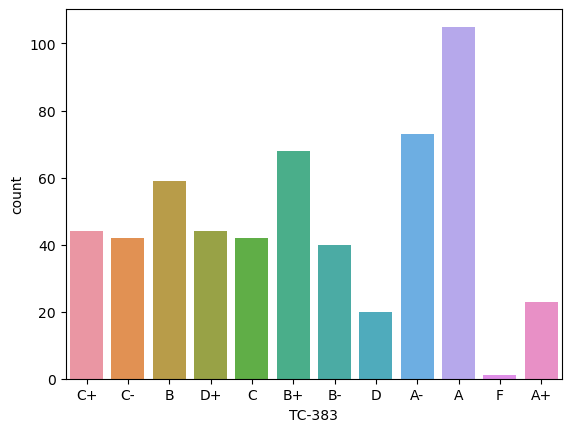

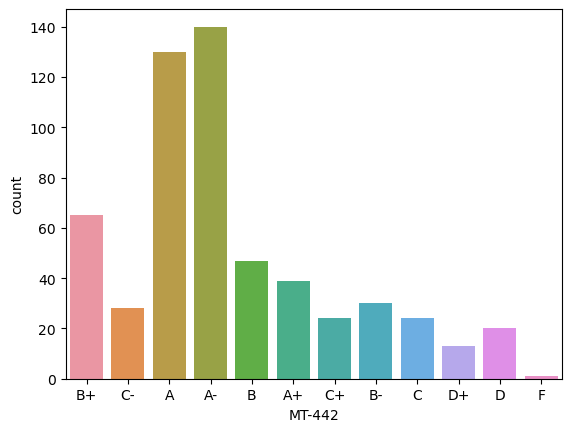

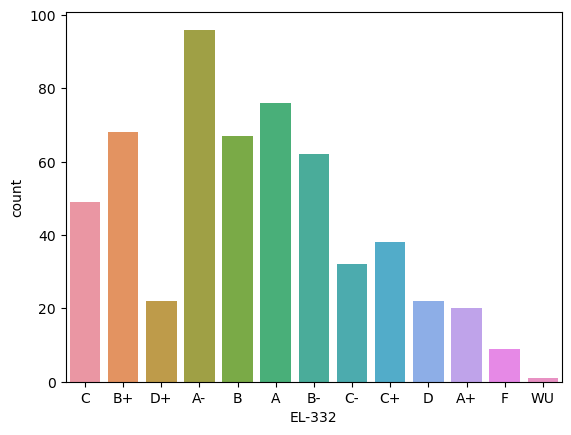

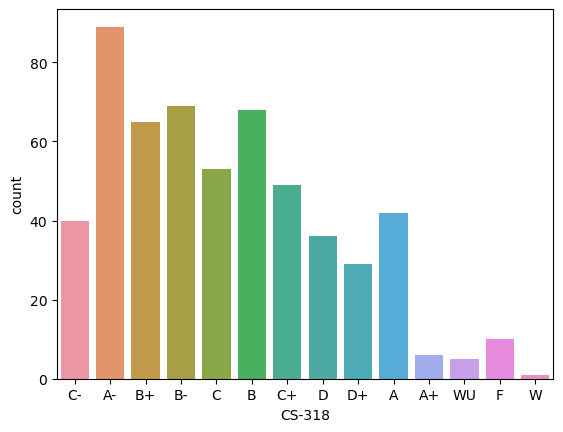

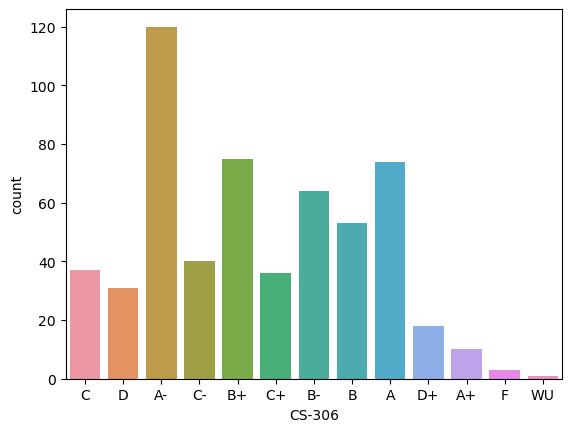

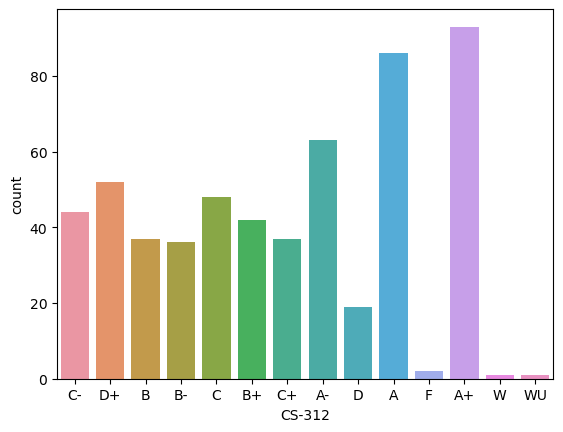

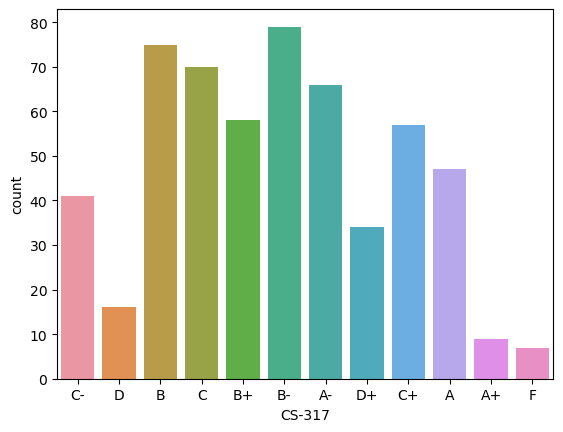

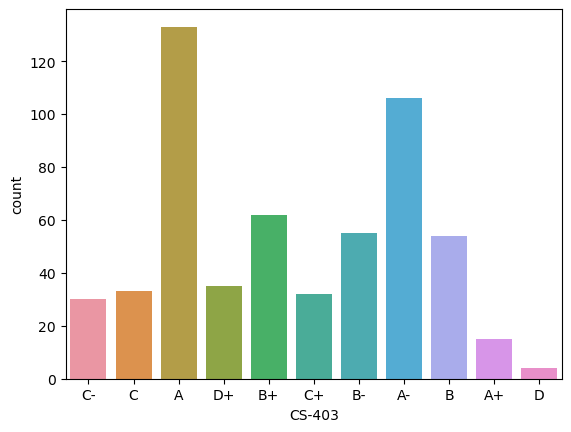

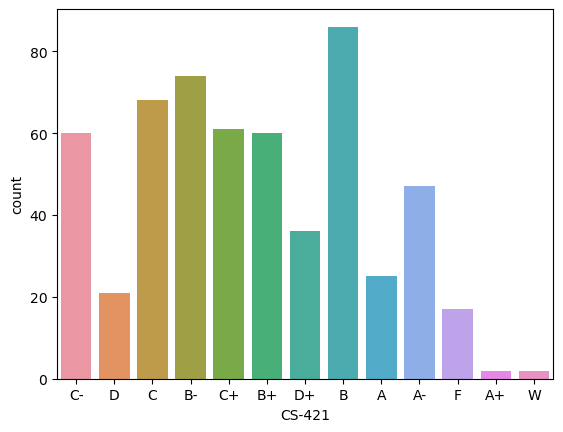

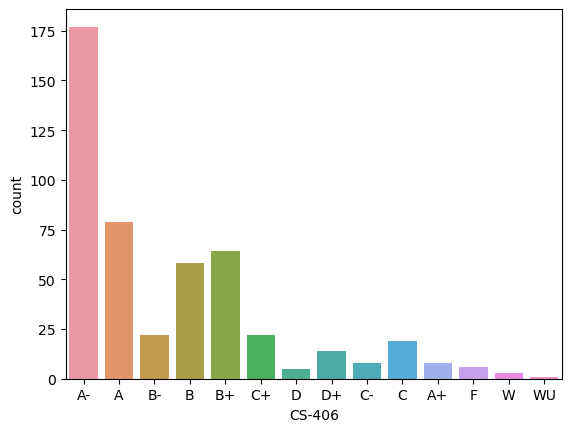

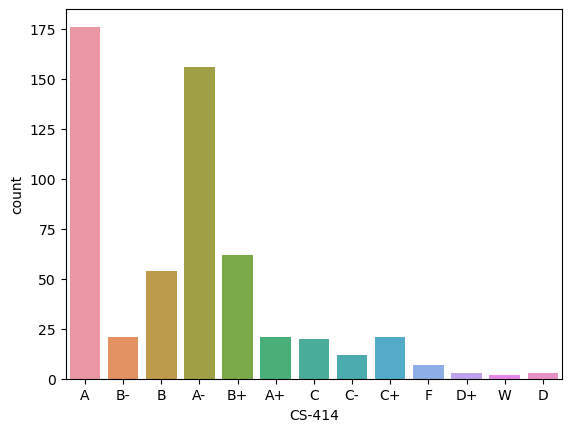

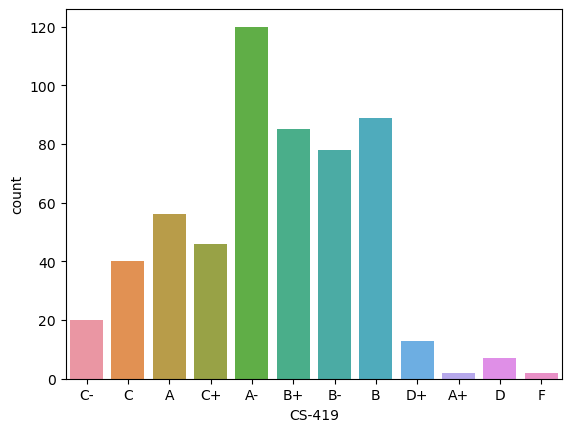

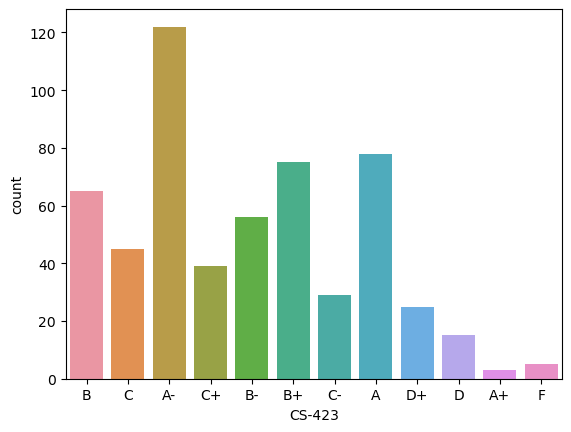

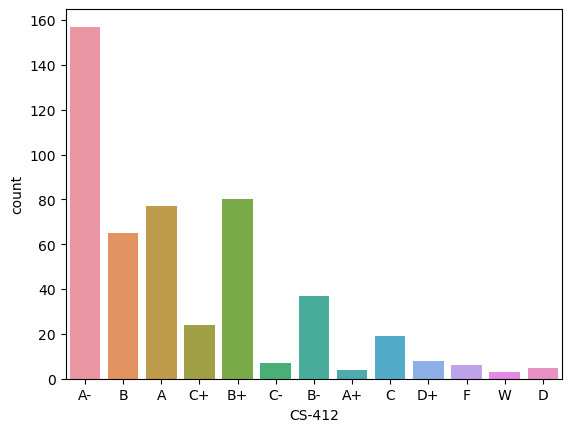

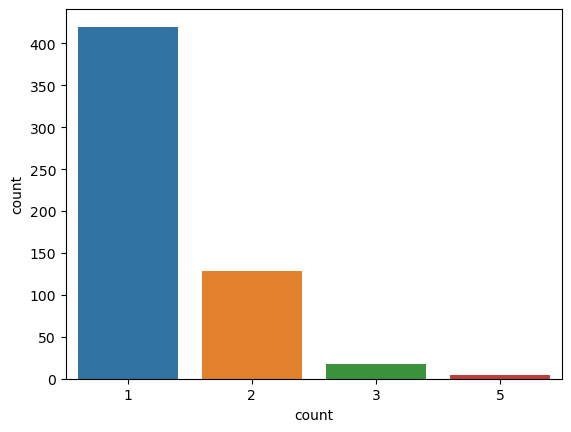

In [126]:
plt.figure(figsize=(15,10))
for col in df.columns:

        sns.countplot(x=df[col],data=x)
        plt.show()

### Observation

from count plot we can observe that all columns with dtype=object have 10 to 15 unique categories and all are having some counts

In [127]:
for i in df.columns:    
    print(i)
    print('Number of unique data:',df[i].nunique())
    print("Value Counts")
    print(df[i].value_counts())
    print("")
    print("****************************************************************************************************")
    print("")

PH-121
Number of unique data: 13
Value Counts
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

****************************************************************************************************

HS-101
Number of unique data: 12
Value Counts
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

****************************************************************************************************

CY-105
Number of unique data: 13
Value Counts
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64

****************************************************************************************************

HS-105
Number of unique data: 13
Value Counts
HS-105
A     96
A-    75
B+    70
B     

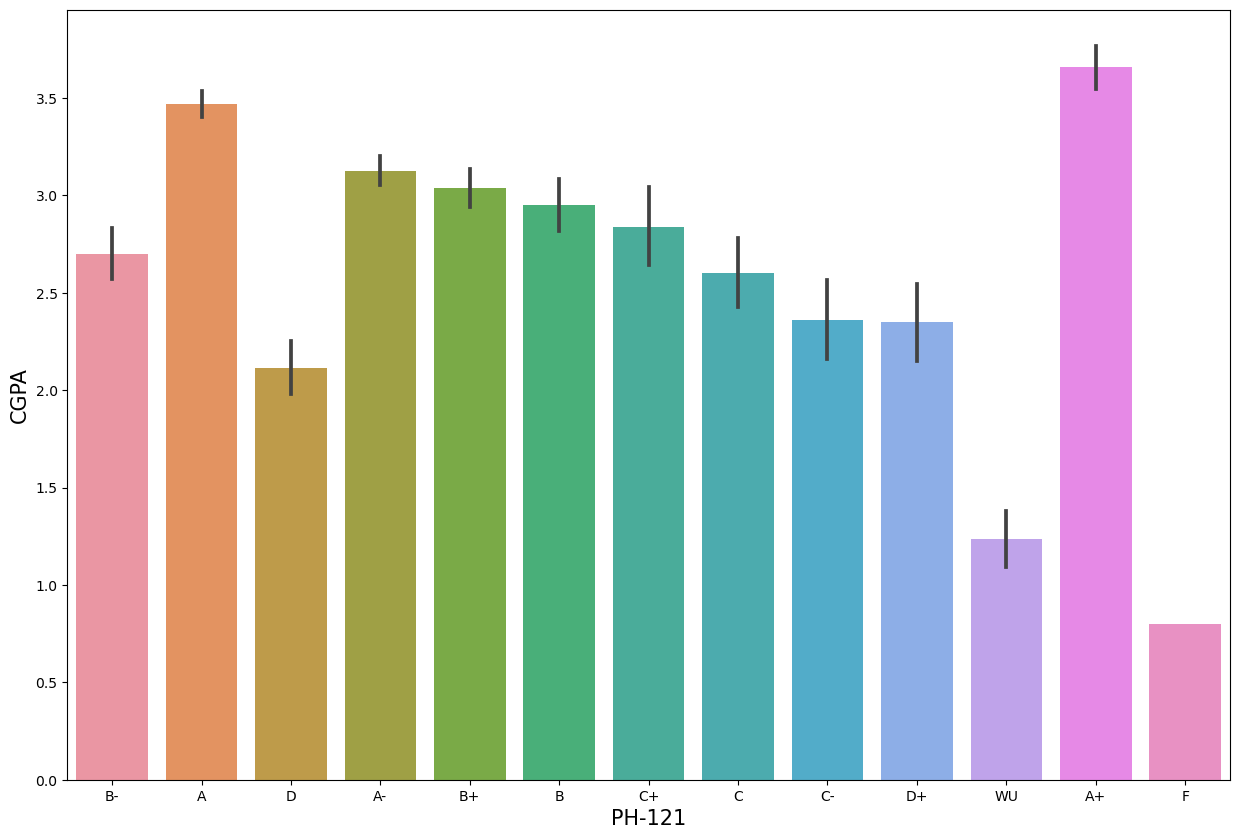

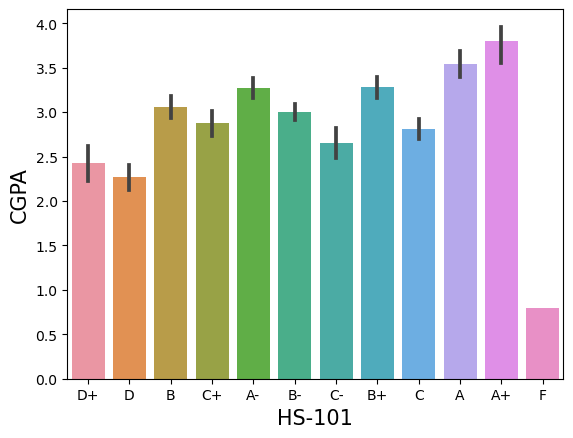

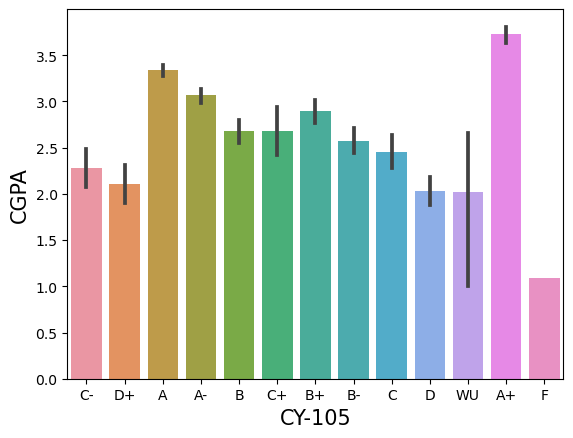

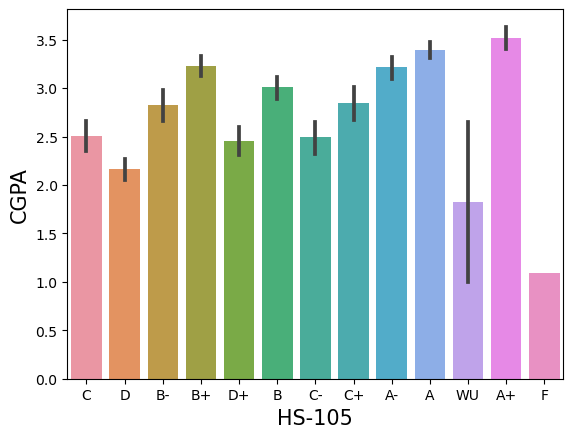

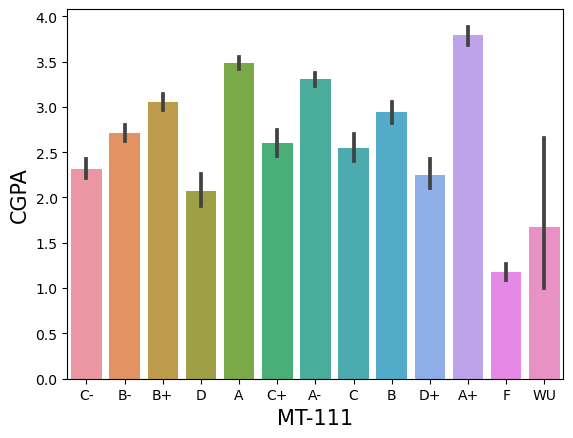

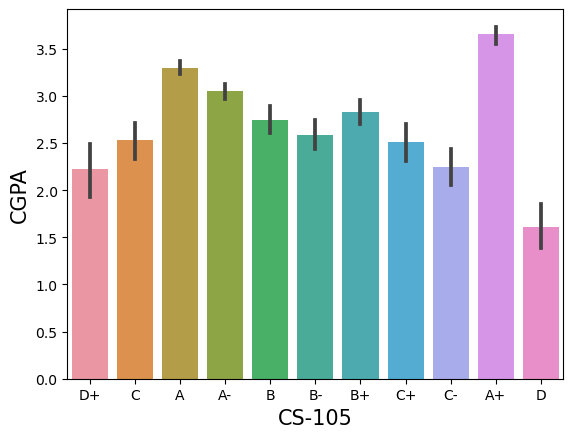

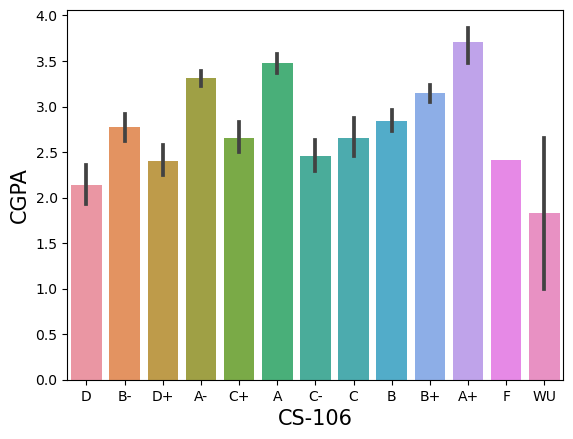

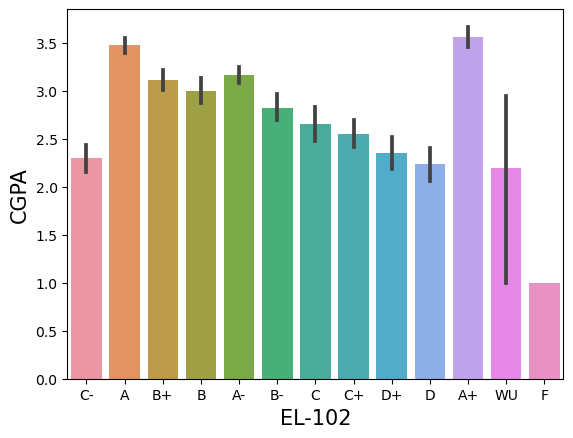

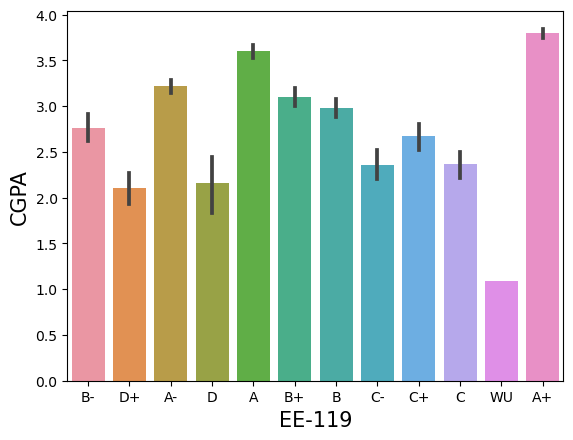

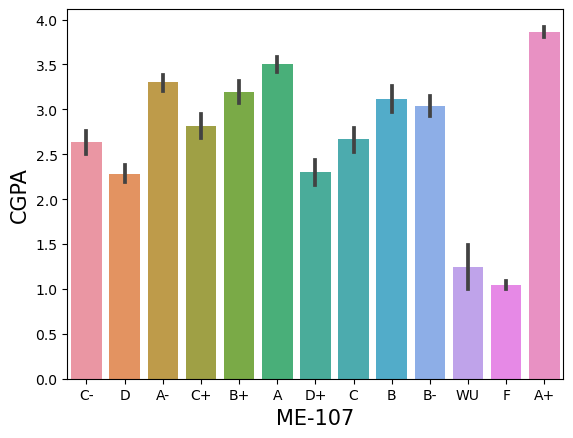

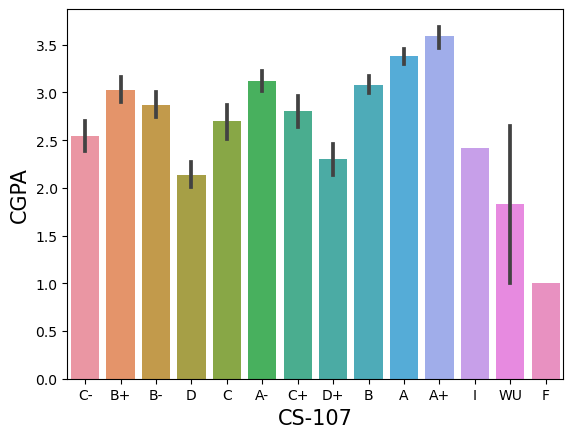

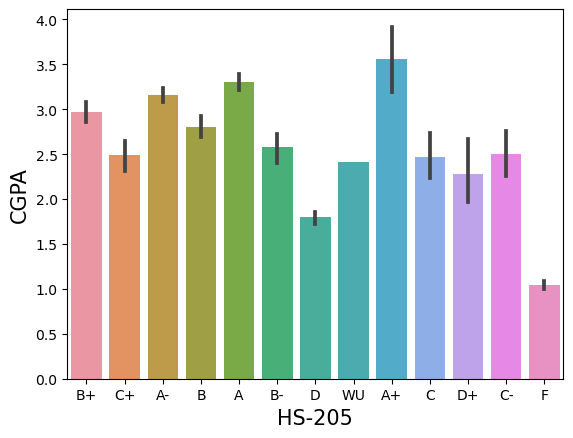

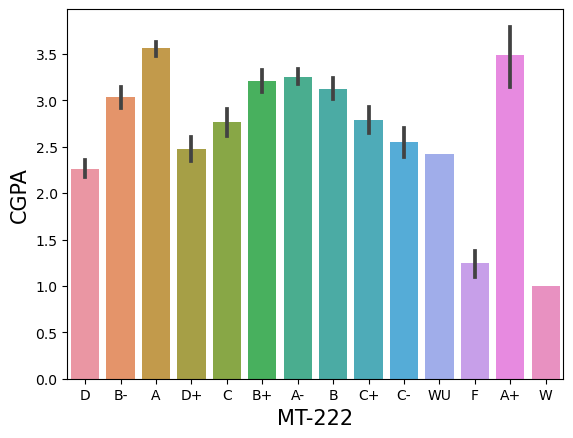

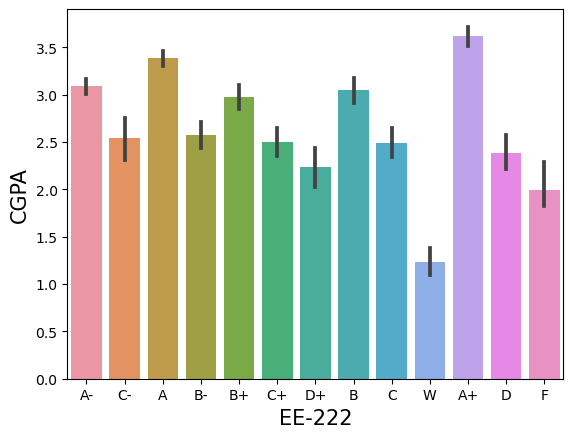

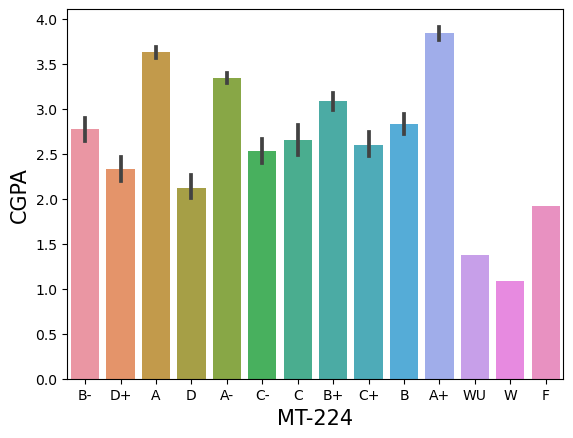

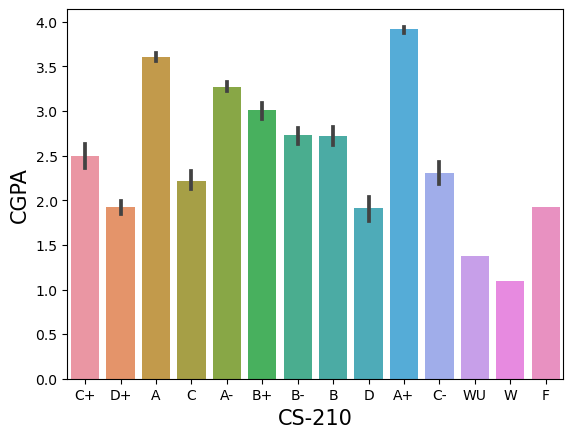

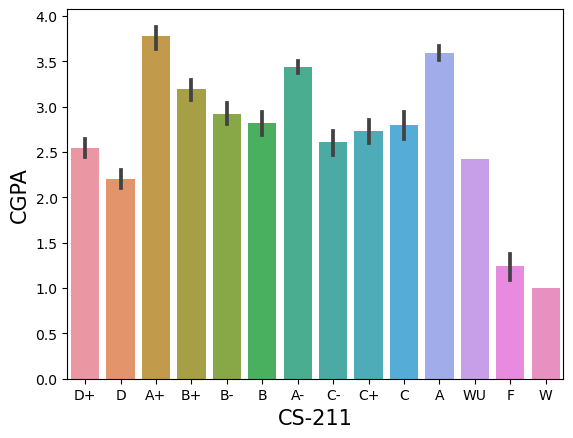

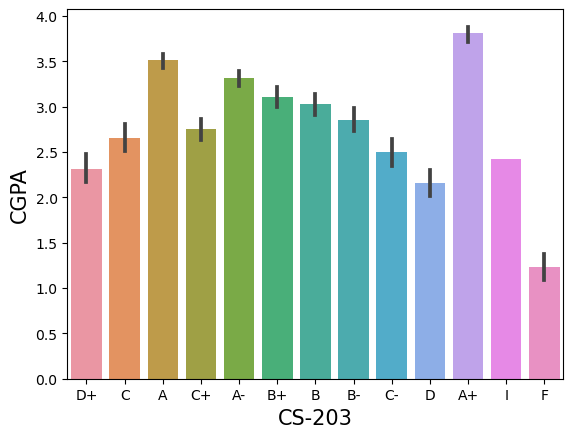

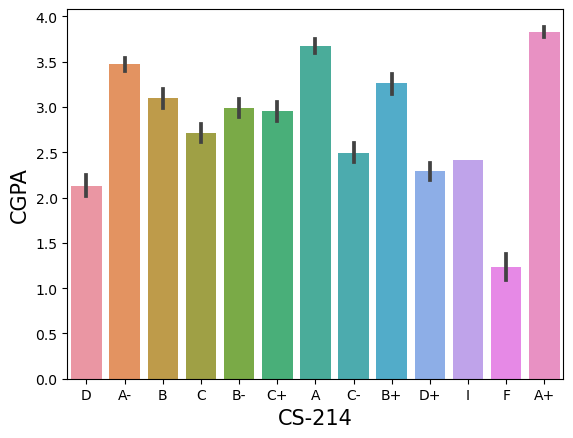

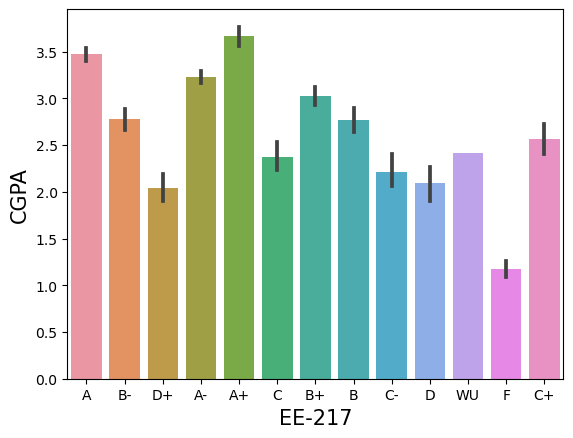

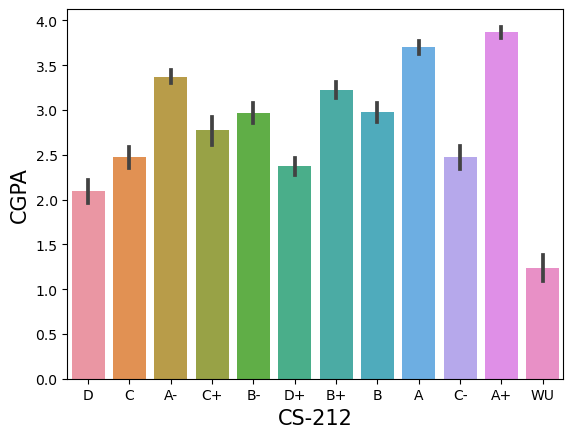

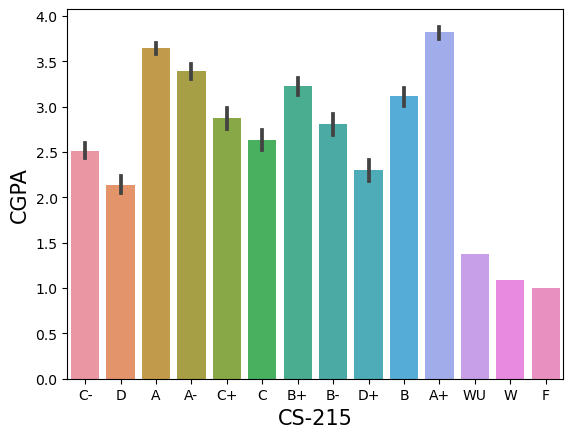

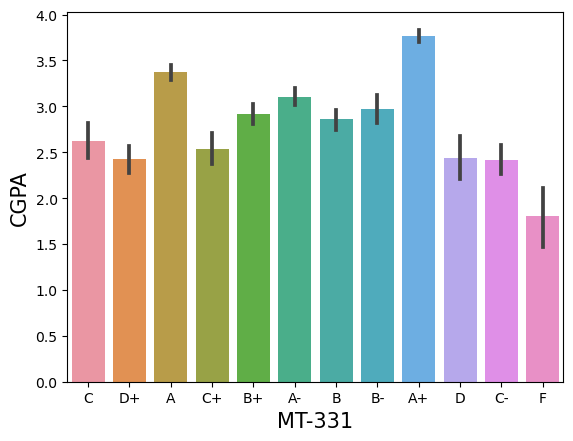

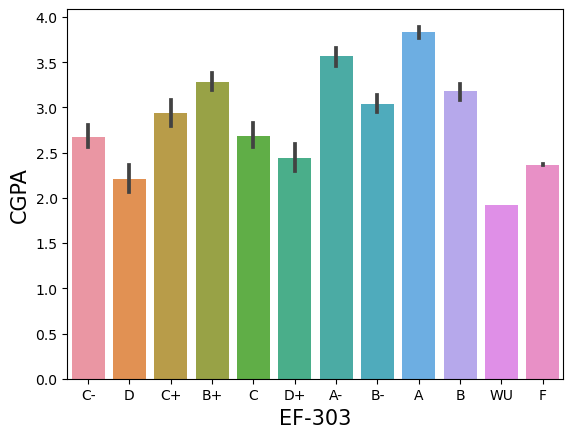

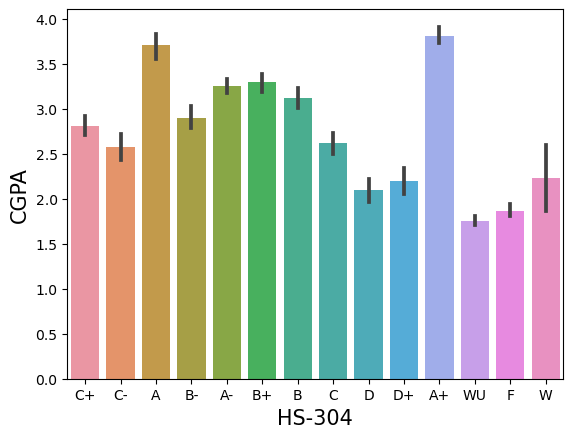

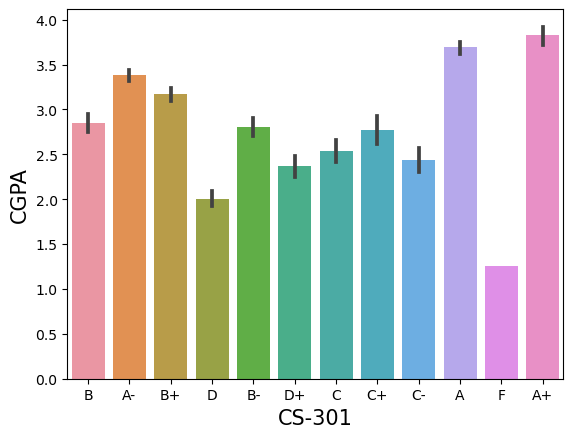

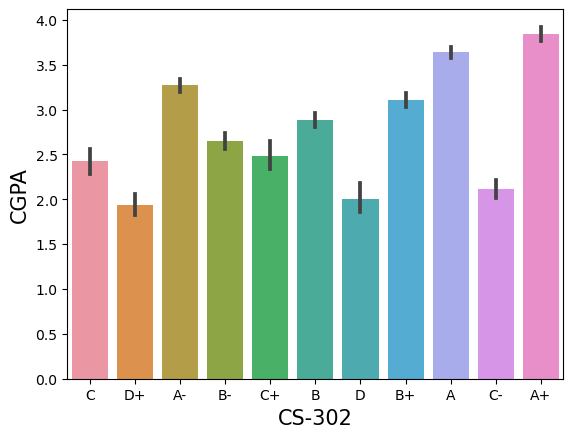

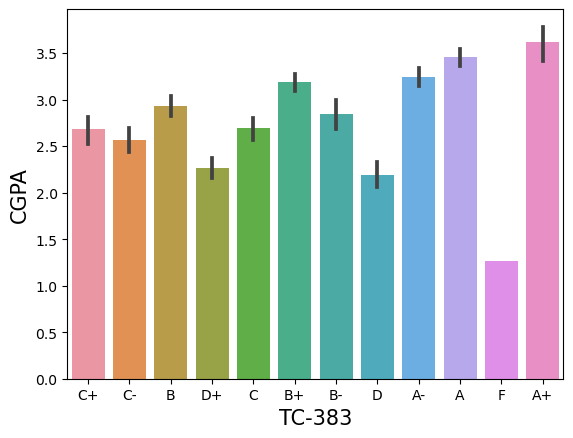

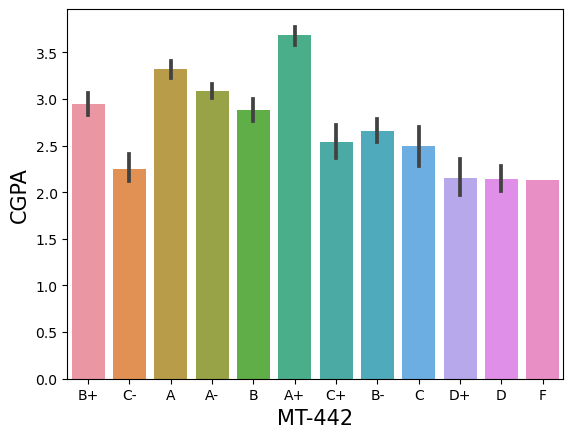

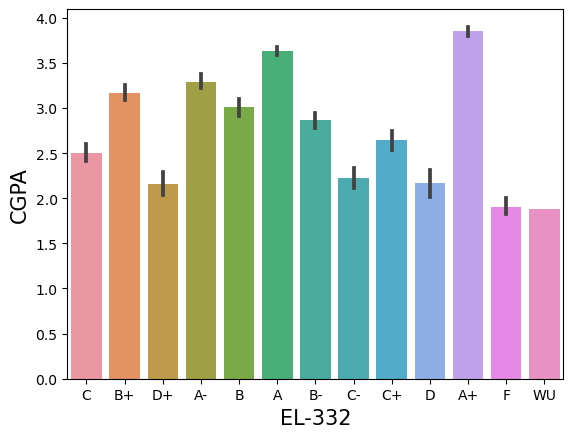

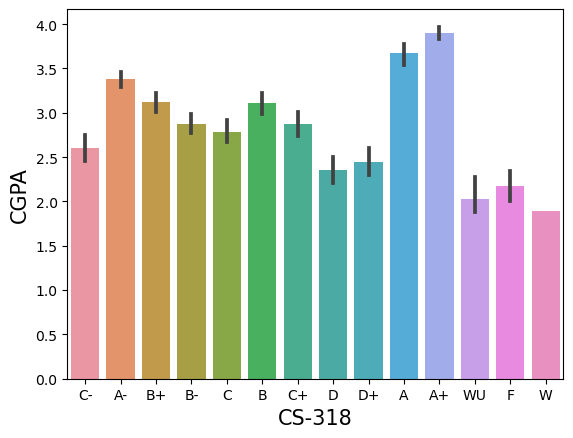

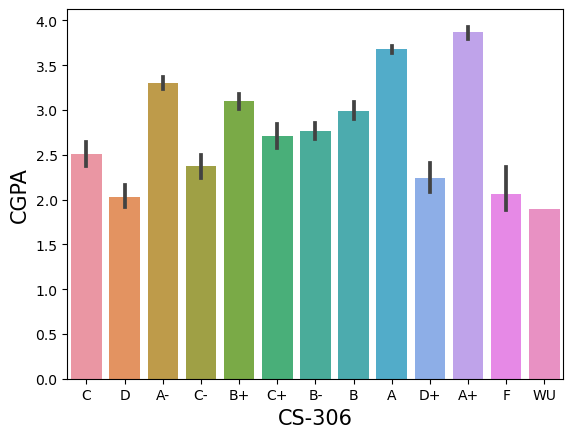

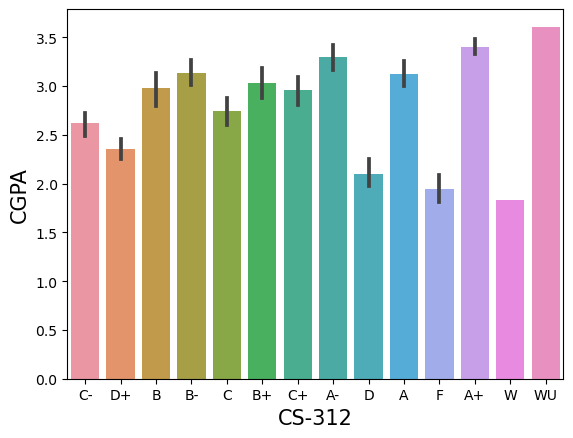

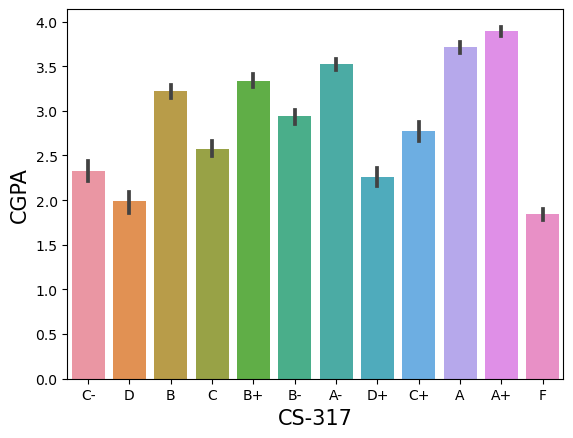

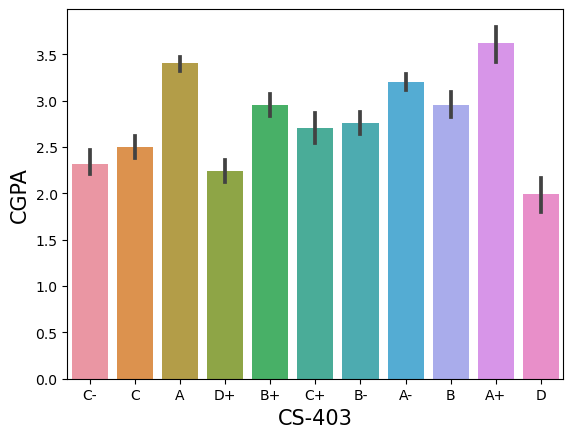

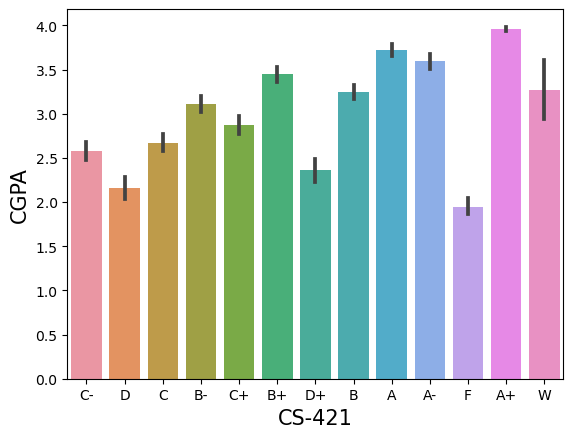

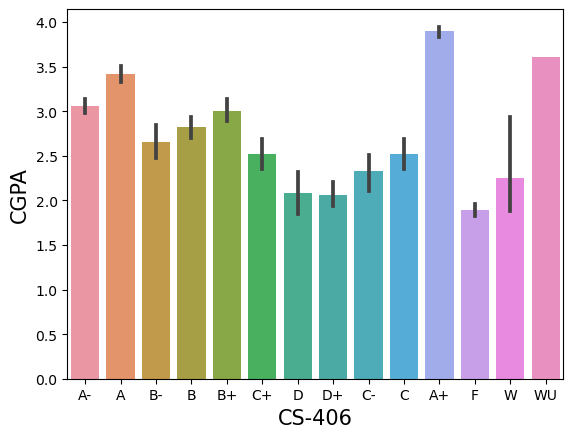

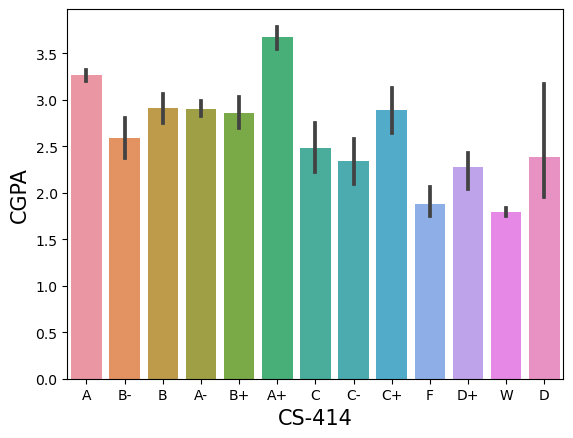

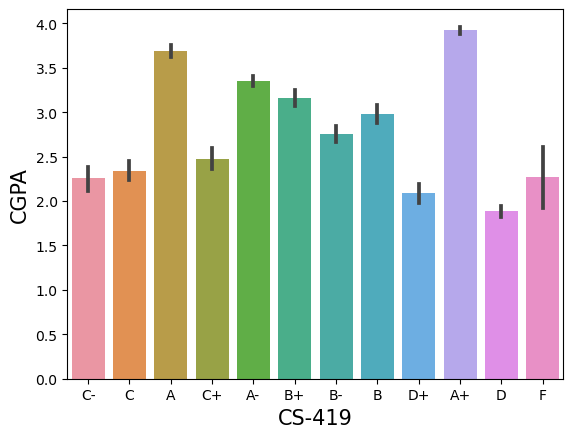

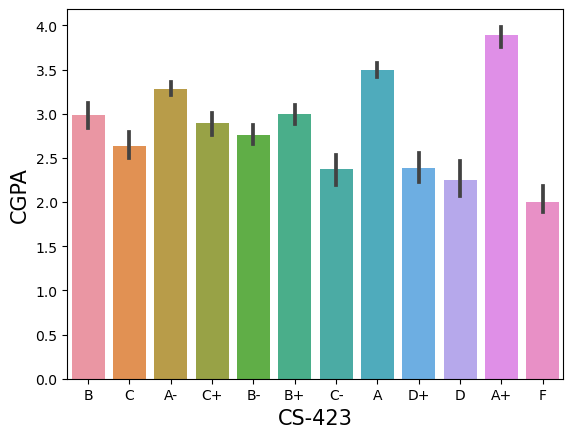

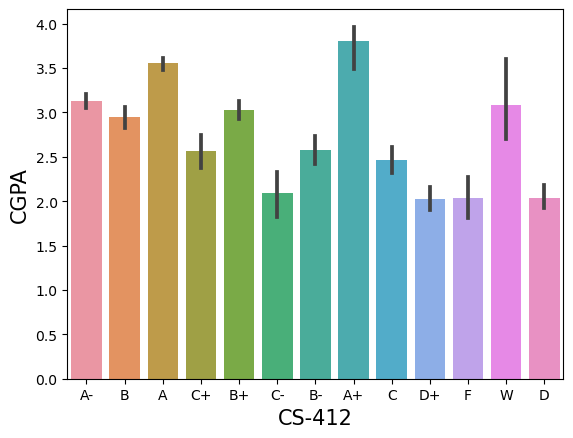

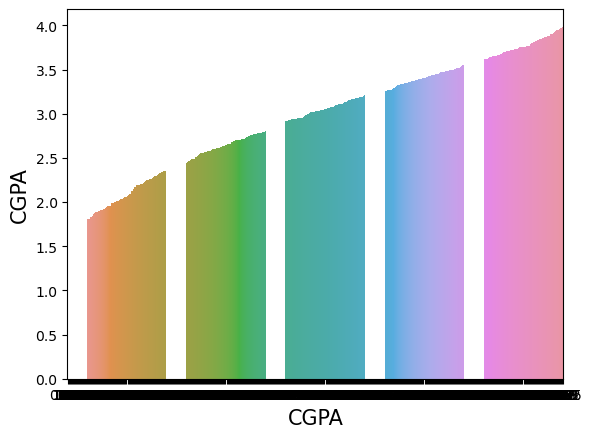

In [128]:
plt.figure(figsize=(15,10))
for col in df.columns:
    
    sns.barplot(x=df[col],y=df['CGPA'],data=df)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA',fontsize=15)
    plt.show()

from here we can observe that features and labels are related in some manner

# label encoder

In [129]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])

In [130]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,72
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,48
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,409
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,33
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,365


# Modelling

In [131]:
#lets import neccesary lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
#importing important metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [132]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split

In [133]:
target_column = 'CGPA' 

In [134]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=112)

In [136]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y1=reg.predict(X_test)
r1=r2_score(y_test,y1)
print('R2 score is :',r1)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.9280149520084299
Mean Absolute Error is : 26.70295875712463
Mean Squared Error is : 1356.1780347149331
Root Mean Squared Error is : 36.82632257930369


In [137]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y2=knn.predict(X_test)
r2=r2_score(y_test,y2)

print('R2 score is :',r2)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.9561084705489505
Mean Absolute Error is : 20.46153846153846
Mean Squared Error is : 826.9040559440558
Root Mean Squared Error is : 28.755939489852455


In [138]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y3=tree.predict(X_test)
r3=r2_score(y_test,y3)

print('R2 score is :',r3)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : 0.8515099627854812
Mean Absolute Error is : 39.06293706293706
Mean Squared Error is : 2797.5104895104896
Root Mean Squared Error is : 52.891497327174335


In [139]:
bag=BaggingRegressor()
bag.fit(X_train,y_train)
y4=bag.predict(X_test)
r4=r2_score(y_test,y4)

print('R2 score is :',r4)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.9467599944516518
Mean Absolute Error is : 24.337062937062942
Mean Squared Error is : 1003.0267132867133
Root Mean Squared Error is : 31.670596983427913


In [140]:
rand=RandomForestRegressor()
rand.fit(X_train,y_train)
y5=rand.predict(X_test)
r5=r2_score(y_test,y5)

print('R2 score is :',r5)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.9637966928523061
Mean Absolute Error is : 19.14748251748252
Mean Squared Error is : 682.0601125874125
Root Mean Squared Error is : 26.116280604010452


In [141]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y6=ada.predict(X_test)
r6=r2_score(y_test,y6)

print('R2 score is :',r6)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y6))
print('Mean Squared Error is :',mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y6)))

R2 score is : 0.9260628114059528
Mean Absolute Error is : 31.740043048107733
Mean Squared Error is : 1392.9558139846592
Root Mean Squared Error is : 37.322323266172205


In [142]:
grad=GradientBoostingRegressor()
grad.fit(X_train,y_train)
y7=grad.predict(X_test)
r7=r2_score(y_test,y7)

print('R2 score is :',r7)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y7))
print('Mean Squared Error is :',mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y7)))

R2 score is : 0.9765474789153591
Mean Absolute Error is : 16.06182500066342
Mean Squared Error is : 441.83889350748916
Root Mean Squared Error is : 21.019964165228473


In [143]:
svr=SVR()
svr.fit(X_train,y_train)
y8=svr.predict(X_test)
r8=r2_score(y_test,y8)

print('R2 score is :',r8)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y8))
print('Mean Squared Error is :',mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y8)))

R2 score is : 0.4709123384298707
Mean Absolute Error is : 83.52611469858039
Mean Squared Error is : 9967.86256423869
Root Mean Squared Error is : 99.83918351147855


In [144]:
xgb=xgb.XGBRegressor()
xgb.fit(X_train,y_train)
y9=xgb.predict(X_test)
r9=r2_score(y_test,y9)

print('R2 score is :',r9)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y9))
print('Mean Squared Error is :',mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y9)))

R2 score is : 0.9487212465995584
Mean Absolute Error is : 23.251320177024894
Mean Squared Error is : 966.077275066713
Root Mean Squared Error is : 31.081783653238322


In [145]:
lasso=Lasso()
lasso.fit(X_train,y_train)
y10=lasso.predict(X_test)
r10=r2_score(y_test,y10)

print('R2 score is :',r10)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y10))
print('Mean Squared Error is :',mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y10)))

R2 score is : 0.9284549918319187
Mean Absolute Error is : 26.29684472690501
Mean Squared Error is : 1347.8878083461834
Root Mean Squared Error is : 36.71359160237777


In [146]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y11=ridge.predict(X_test)
r11=r2_score(y_test,y11)

print('R2 score is :',r11)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y11))
print('Mean Squared Error is :',mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y11)))

R2 score is : 0.9280360562961683
Mean Absolute Error is : 26.69685578756602
Mean Squared Error is : 1355.7804358764563
Root Mean Squared Error is : 36.82092388678557


In [147]:
performance=pd.DataFrame({"Models": ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor',
                                           'AdaBoostRegressor','GradientBoostingRegressor','SVR','XGBRegressor','Lasso','Ridge'],
                          "r2 value":[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11]})
performance

,Models,r2 value
0,LinearRegression,0.928015
1,KNeighborsRegressor,0.956108
2,DecisionTreeRegressor,0.851510
3,BaggingRegressor,0.946760
4,RandomForestRegressor,0.963797
5,AdaBoostRegressor,0.926063
6,GradientBoostingRegressor,0.976547
7,SVR,0.470912
8,XGBRegressor,0.948721
9,Lasso,0.928455


In [148]:
import plotly.express as px
fig=px.bar(performance, x=performance['Models'], y=performance['r2 value'])
fig.update_layout(
    template="plotly_dark")
fig

from above results it is clear that our gradient boosting regressor is giving best score i.e 97%.

Let's check cross val score for all models

In [149]:
#import cross val score
from sklearn.model_selection import cross_val_score

In [150]:
score1=cross_val_score(reg,X,y)
print(score1)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y1)-score1.mean())*100)

[0.92136761 0.85602385 0.93214758 0.91312464 0.86433569]
Difference of r2_score and cross vald score is : 3.0615078168371057


In [151]:
score2=cross_val_score(knn,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y2)-score2.mean())*100)

Difference of r2_score and cross vald score is : 0.28354795091467544


In [152]:
score3=cross_val_score(tree,X,y)
print(score3)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y3)-score3.mean())*100)

[0.84916065 0.84734811 0.77672945 0.76581923 0.82901448]
Difference of r2_score and cross vald score is : 3.789557726521775


In [153]:
score4=cross_val_score(bag,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y4)-score4.mean())*100)

Difference of r2_score and cross vald score is : 1.5893850145821675


In [154]:
score5=cross_val_score(rand,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y5)-score5.mean())*100)

Difference of r2_score and cross vald score is : 1.544629502357242


In [155]:
score6=cross_val_score(ada,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y6)-score6.mean())*100)

Difference of r2_score and cross vald score is : 0.5359917332336761


In [156]:
score7=cross_val_score(grad,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y7)-score7.mean())*100)

Difference of r2_score and cross vald score is : 1.166955820766602


In [157]:
score8=cross_val_score(svr,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y8)-score8.mean())*100)

Difference of r2_score and cross vald score is : 0.2848211501313813


In [158]:
score9=cross_val_score(xgb,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y9)-score9.mean())*100)

Difference of r2_score and cross vald score is : 1.8193073759630085


In [159]:
score10=cross_val_score(lasso,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y10)-score10.mean())*100)

Difference of r2_score and cross vald score is : 2.7692011163249153


In [160]:
score11=cross_val_score(ridge,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y11)-score11.mean())*100)

Difference of r2_score and cross vald score is : 3.061831878065857


As per the difference between r2score and cross val score our RandonmForest and GradientBoosting model is giving better score

Now lets tune our parameter using Grid Search cv

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
param={
       'C':[1,5,10,15,20],
      'epsilon':[0.2,0.5,0.6,1.0,1.2,1.5],
       'gamma':[0.001,0.1,0.2,0.002,0.02]
      }
gridsearch=GridSearchCV(estimator=svr,param_grid=param,cv=5)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'C': 20, 'epsilon': 1.5, 'gamma': 0.001}

In [163]:
best=gridsearch.best_estimator_
best.fit(X_train,y_train)
y12=best.predict(X_test)
print('R2 score is :',r2_score(y_test,y12))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y12))
print('Mean Squared Error is :',mean_squared_error(y_test,y12))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y12)))

R2 score is : 0.9727521053500221
Mean Absolute Error is : 11.651593039124611
Mean Squared Error is : 513.3426627826086
Root Mean Squared Error is : 22.657066508765176


In [164]:
score12=cross_val_score(best,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y12)-score12.mean())*100)

Difference of r2_score and cross vald score is : -0.9567993014934939


In [165]:
import plotly.graph_objects as go

In [166]:
x_values = np.arange(len(y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=y_test, mode='lines', name='Original Values', line=dict(color='black')))

fig.add_trace(go.Scatter(x=x_values, y=y12, mode='lines', name='Predicted Values', line=dict(color='red')))

fig.update_layout(
    title='Comparison of Predicted and Original Values',
    xaxis_title='Index',
    yaxis_title='Value',
    legend=dict(x=0.7, y=0.9),
    width=900,
    height=600
)
fig.show()

### Obeservation
As per the observation our GreadientBoosting model was performing best after parameters tuning.